<a href="https://colab.research.google.com/github/fredprada/heart_failure_prediction_kaggle/blob/main/Heart_Failure_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:

# #Data Exploration libraries

# import scipy
# #Advanced tools
# import itertools

# # Pickle will be needed to save the models
# import pickle
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split

# Importing and Opening database

## Importing

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
path = 'https://raw.githubusercontent.com/fredprada/heart_failure_prediction_kaggle/main/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(path)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Understanding the data

The following data is presented together with the dataset on kaggle:

* Age
 * Age of the patient
 * years
* Anaemia
 * Decrease of red blood cells or hemoglobin
 * 1 - Yes
 * 0 - No
* High blood pressure
 * if a patient has hypertension
 * 1 - Yes
 * 0 - No
* Creatinine phosphokinase
 * Level of the CPK enzyme in the blood
 * mcg/L
* Diabetes
 * if the patient has diabetes
 * 1 - Yes
 * 0 - No
* Ejection fraction
 * percentage of the blood leaving
 * %
* Sex
 * 1 - Male
 * 0 - Female
* Platelets
 * platelets in the blood
 * kiloplatelets/mL
* Serum creatinine
 * level of creatinine in the blood
 * mg/dL
* Serum sodium
 * level of sodium in the blood
 * mE1/L
* Smoking
 * if the patient smokes
 * 1 - Yes
 * 0 - No
* Time
 * follow-up period
 * days
* death event (target)
 * if the patient died during the follow-up period

# Lets explore the data

## Data types and columns corrections

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The following columns are categorized incorrectly, and should be boolean:
<br>
* Smoking
* Anaemia
* Diabetes
* High blood pressure
* Death Event


These next columns on the other hand should be integers:
* Age
* Platelets


Lets convert them:

In [50]:
df = df.astype({'smoking':'bool', 'anaemia':'bool', 'diabetes':'bool','high_blood_pressure':'bool','DEATH_EVENT':'bool', 'age':int, 'platelets':int})

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    bool   
dtypes: bool(5), float64(1), int64(7)
memory usage: 20.3 KB


Since the column "sex" is defined as object and its values are 0 (female) and 1 (male), lets correct it before we move on

In [43]:
df.loc[df['sex'] == 1, 'sex'] = 'male'
df.loc[df['sex'] == 0, 'sex'] = 'female'

Now lets take a look on all our data.
<br>
What interest statistics can we gather from it?
<br>
What could help us define some 

In [44]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,299.0,NaN,NaN,NaN,60.829431,11.894997,40.0,51.0,60.0,70.0,95.0
anaemia,299,2,False,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creatinine_phosphokinase,299.0,NaN,NaN,NaN,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299,2,False,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ejection_fraction,299.0,NaN,NaN,NaN,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299,2,False,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platelets,299.0,NaN,NaN,NaN,263358.026756,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,NaN,NaN,NaN,1.39388,1.03451,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,NaN,NaN,NaN,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299,2,male,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values Check

In [55]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No null data was found on the dataset, so there are no missing values.

## Outliers Check

There are many ways to check for outliers on a dataset. <br>
We can specify a few: <br>
* Sorting values and finding the outliers manually on the dataset;
* Using graphic tools, such as a Histogram or a Boxplot chart;
* Using Z-Score, when the data follows a normal distribution


For this study, we will use the graphical solution for each given column, analyzing the respective boxplot charts.

In order to study the outcomes of these charts, we need to have a good understanding on how to read boxplot charts, so here is a quick support:
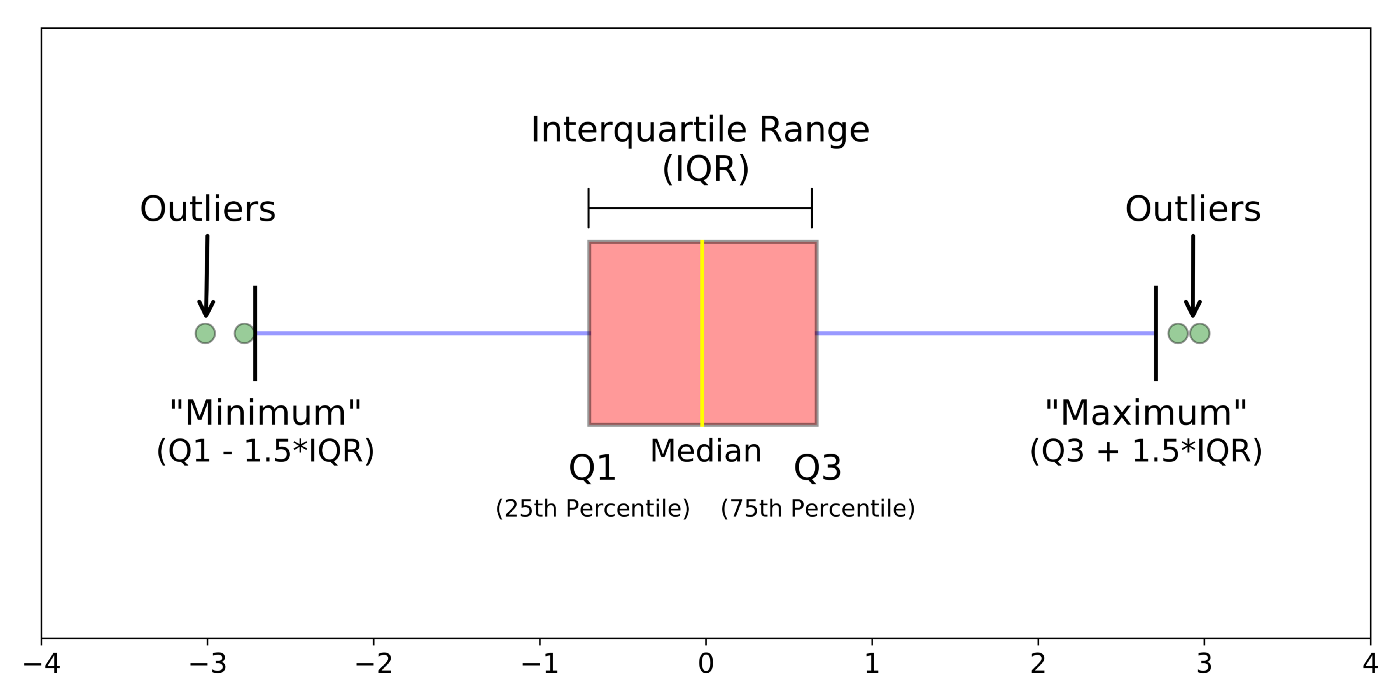
<br>
font: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51#:~:text=A%20boxplot%20is%20a%20standardized,and%20what%20their%20values%20are.

In [14]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In order to work with boxplots, we will only need the numerical values from our dataframe, so every other column will not be used right now.
<BR>
Lets organize this new df to work with:

In [15]:
df_numeric = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]

In [56]:
for coluna in df_numeric.columns:
  fig = px.box(df_numeric, x=coluna, height = 200, width= 1100)
  fig.show()

From the charts above, we can see that just "age" and "time" do not have outliers, however, the other columns have several points that need to be studied. <br>
The following columns should be deeper understood:<br>
* creatinine_phosphokinase
* ejection_fraction
* platelets
* serum_creatinine
* serum_sodium

### Understanding a little bit more about the data:


* creatinine_phosphokinase
  * Creatine phosphokinase (a.k.a., creatine kinase, CPK, or CK) is an enzyme (a protein that helps to elicit chemical changes in your body) found in your heart. When muscle tissue is damaged, CPK leaks into your blood. Therefore, high levels of CPK usually indicate some sort of stress or injury to your heart or other muscles.
    * lower fence: 1211
    * normal range: 10 - 120 mcg/L
  * **all data is acceptable**
* ejection_fraction
  * Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.
    * upper fence: 65
    * normal range: 50% - 75%
    * below 30% is severe
    * below 20% is very severe
  * **all data is acceptable**
* platelets
  * Platelets, also known as thrombocytes, are blood cells.Platelets play a major role in blood clotting. Normally, when one of your blood vessels is injured, you start to bleed. Your platelets will clot (clump together) to plug the hole in the blood vessel and stop the bleeding.
    * lower fence: 75k
    * upper fence: 427k
    * 150k - 450k
    * having more than 450k is called thrombocytosis.
    * having less than 150k is called thrombocytopenia.
    * below than 50k is serious and below 10k is severe, with risk of internal bleeding.
  * **all data is acceptable**
* serum_creatinine
  * Creatinine is a waste product that comes from the normal wear and tear on muscles of the body. Everyone has creatinine in their bloodstream.
    * upper fence: 2.1
    * normal range:
      * male: 0.74 - 1.35
      * female: 0.59 - 1.04
    * high serum creatinine can mean kidney damage or dehydration.
    * over 1.3 is high
  * **despite some numbers are really high, all data is acceptable**
* serum_sodium
  * Sodium is an electrolyte, and it helps regulate the amount of water that's in and around your cells.
    * lower fence: 125
    * normal range: 135 - 145
    * below 135 is low (hyponatremia)
  * **all data is acceptable**
<br>

fonts:
* https://www.hopkinslupus.org/lupus-tests/clinical-tests/creatine-phosphokinase-cpk/
* https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711
* https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646

## Analyzing the data

### Correlation between variables

Before asking analytical questions and jump into insightful visualizations, it is crucial to understand which variables (independent ones) affect the most our dependent variable.

In [52]:
import seaborn as sns

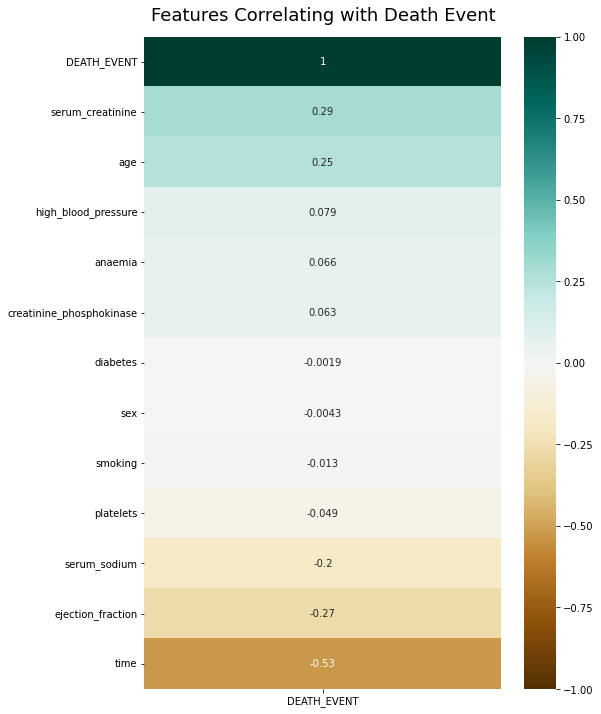

In [53]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Death Event', fontdict={'fontsize':18}, pad=16);

### Understanding critical variables and their relation to Death event

In [26]:
fig = px.histogram(df, x="age", color="DEATH_EVENT", height=400, width=1100, marginal="violin", hover_data=df.columns,
                   title ="Distribution of age Vs DEATH_EVENT",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

##Standardization of the data - PCA analysis

Using standardization techniques in order to tackle data variation from column to column
<br>
Choice for Standardization is because of the Distance - Based Algorithms we will be using

In [21]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier as knn
# from sklearn import metrics
# from sklearn import datasets

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
heart_failure_std = scaler.fit_transform(df_numeric)
print(heart_failure_std)

[[ 1.19294523e+00  1.65728387e-04 -1.53055953e+00 ...  4.90056987e-01
  -1.50403612e+00 -1.62950241e+00]
 [-4.91279276e-01  7.51463953e+00 -7.07675018e-03 ... -2.84552352e-01
  -1.41976151e-01 -1.60369074e+00]
 [ 3.50832977e-01 -4.49938761e-01 -1.53055953e+00 ... -9.09000174e-02
  -1.73104612e+00 -1.59078490e+00]
 ...
 [-1.33339153e+00  1.52597865e+00  1.85495776e+00 ... -5.75030855e-01
   3.12043840e-01  1.90669738e+00]
 [-1.33339153e+00  1.89039811e+00 -7.07675018e-03 ...  5.92615005e-03
   7.66063830e-01  1.93250906e+00]
 [-9.12335403e-01 -3.98321274e-01  5.85388775e-01 ...  1.99578485e-01
  -1.41976151e-01  1.99703825e+00]]


In [58]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

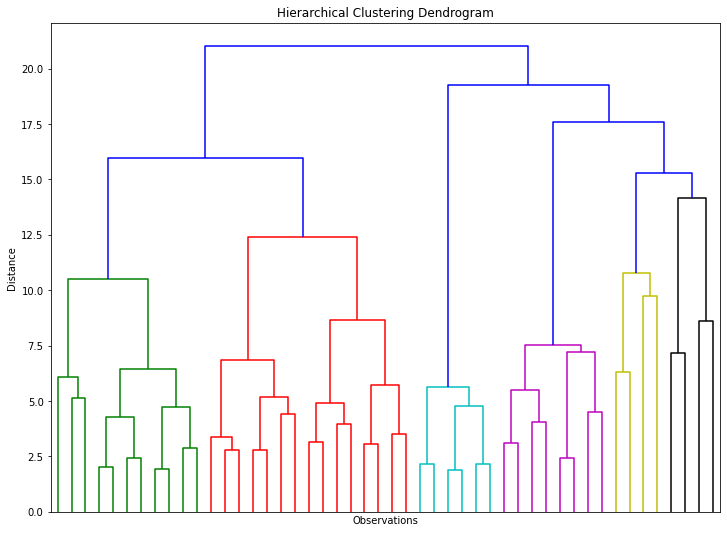

In [59]:
# hierarchical clustering
# When an Hierarchical Clustering is performed, the results will be a linkage matrix
hier_clust = linkage(heart_failure_std, method = 'ward')

# plotting the results from the Hierarchical Clustering using a Dendrogram
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

In [60]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

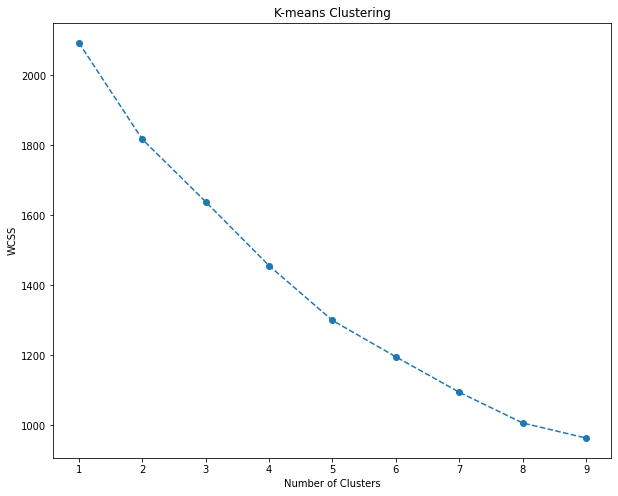

In [61]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(heart_failure_std)
    wcss.append(kmeans.inertia_)
    
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
plt.figure(figsize = (10,8))
plt.plot(range(1, 10), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [62]:
#reducing the dimensionality 
# Using PCA to find a subset of components.
pca = PCA()
# Fitting PCA with our standardized data.
pca.fit(heart_failure_std)
# These attributes shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_
# We can choose three components. 
pca = PCA(n_components = 2)
#Fitting the model of the data with the selected number of components previously selected in the cell above.
pca.fit(heart_failure_std)
# we can discucss the results from the PCA here.
pca.components_
df_Pca_Comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2'])
df_Pca_Comp
# Heat Map for Principal Components against existing features. 
# Here the viridis color scheme will be used and set borders to -1 and 1.
sns.heatmap(df_Pca_Comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'viridis',
            annot = True)
plt.yticks([0, 1], 
           ['Component 1', 'Component 2'],
           rotation = 45,
           fontsize = 9)


ValueError: ignored

##Data analysis and charts

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

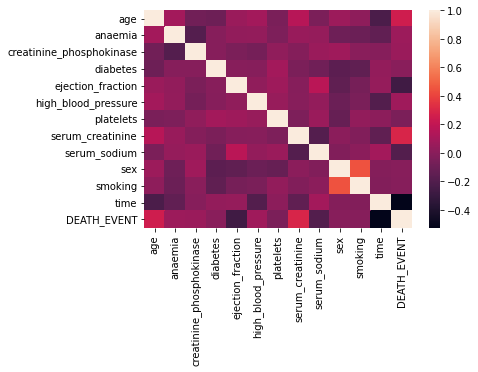

In [ ]:
corr = pd.DataFrame(df).corr()
heatmap = sns.heatmap(corr)
plt.show()

In [ ]:
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
high_blood = [1,0]
high_blood_occurences = df['high_blood_pressure'].value_counts(1)

In [ ]:
df.shape

(299, 12)

In [ ]:
df_cluster = df.iloc[:,299:12].values

In [ ]:
from sklearn.cluster import KMeans
modelokm = KMeans(n_clusters = 2)
modelokm = modelokm.fit(df)
modelokm.cluster_centers_

array([[6.10883205e+01, 4.23076923e-01, 5.69085470e+02, 4.01709402e-01,
        3.79401709e+01, 3.33333333e-01, 2.26025858e+05, 1.39205128e+00,
        1.36444444e+02, 6.75213675e-01, 3.16239316e-01, 3.07692308e-01],
       [5.99179538e+01, 4.61538462e-01, 6.27753846e+02, 4.76923077e-01,
        3.86000000e+01, 4.15384615e-01, 3.97753846e+05, 1.40046154e+00,
        1.37276923e+02, 5.53846154e-01, 3.38461538e-01, 3.69230769e-01]])

In [ ]:
# Mostra a quantidade de clusters
modelokm.n_clusters

2

In [ ]:
# Mostra as labels
labels = modelokm.labels_
labels 

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtyp

In [ ]:
# Faz a clusterização dos dados usando o modelo criado
grupos = modelokm.predict(df)

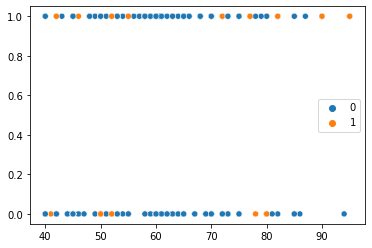

In [ ]:
# Mostra o Gráfico de Clusters
sns.scatterplot(x=df[:,0], y=df[:,1], hue=labels)
plt.show()

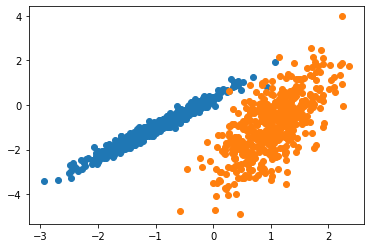

In [ ]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()